# Aprendizaje Formal

## Práctica 5: Evaluación de modelos - Bias y varianza

### Índice de la práctica

- [Lectura de datos](#Lectura-de-datos)
- [Visualización de datos](#Visualización-de-datos)
- [Regresión lineal - Curva de aprendizaje](#Regresión-lineal---Curva-de-aprendizaje)
- [Regresión polinomial - Curva de aprendizaje](#Regresión-polinomial---Curva-de-aprendizaje)
- [Seleccionando el valor de lambda usando el conjunto de validación](#Seleccionando-el-valor-de-lambda-usando-el-conjunto-de-validación)
- [Particionamiento de los datos en particiones de train/val/test](#Particionamiento-de-los-datos-en-particiones-de-train/val/test)

Importamos todas las librerías que vamos a utilizar durante la segunda práctica.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from test_helper import Test

from scipy.optimize import minimize

%matplotlib inline  

En esta práctica vamos a utilizar la regresión lineal regularizada para estudiar los conceptos de bias y varianza.

## Lectura de datos

En primer lugar vamos a leer los datos. Los datos son datos históricos del cambio en el nivel del agua ($x$) y la cantidad de agua que atraviesa la presa ($y$) en base a dichos cambios.

El conjunto de datos está dividido en tres partes:
* Conjunto de train para entrenar el modelo de regresión: fichero `datosAgua_train.txt`
* Conjunto de validación para buscar el mejor valor de regularización: fichero `datosAgua_val.txt`
* Conjunto de test para evaluar el rendimiento de la regresión obtenida sobre ejemplos no utilizados en el entrenamiento: fichero `datosAgua_test.txt`

Utiliza la función `np.loadtxt` para leer los tres ficheros delimitados por comas.

In [15]:
# Cargar fichero de datos
train = np.loadtxt('datosAgua_train.txt',delimiter=',')
val = np.loadtxt('datosAgua_val.txt',delimiter=',')
test = np.loadtxt('datosAgua_test.txt',delimiter=',')

Como los datos leídos contienen tanto los valores de las variables predictivas ($x$) como las de las variables a predecir ($y$), vamos a separar ambas en las variables correspondientes (`Xtrain, ytrain, Xval, yval, Xtest, ytest`).

In [16]:
# Crea las variables Xtrain, ytrain, Xtest, ytest, Xval, e yval
Xtrain=train[:,0].reshape(-1,1)
Ytrain=train[:,1:]

Xval=val[:,0].reshape(-1,1)
Yval=val[:,1:]

Xtest=test[:,0].reshape(-1,1)
Ytest=test[:,1:]



Obtén ahora el número de ejemplos que tenemos en cada conjunto.

In [18]:
# m = Número de ejemplos
mtrain =Xtrain.shape[0]
mval = Xval.shape[0]
mtest = Xtest.shape[0]

## Visualización de datos
Ahora debes mostrar una gráfica con los datos de entrenamiento leídos.
Para ello, utiliza la función [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) de matplotlib. La figura que debes obtener debe ser la siguiente:
![Figura a obtener](img1.png)

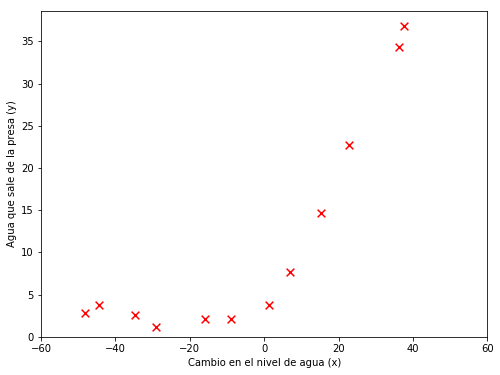

In [19]:
# Dibujar datos
plt.figure(figsize=(8, 6))
plt.scatter(Xtrain,Ytrain,s=60,marker='x' ,c='red')
axes = plt.gca()
axes.set_xlabel("Cambio en el nivel de agua (x)")
axes.set_ylabel("Agua que sale de la presa (y)")

plt.xlim(-60,60)
plt.ylim(ymin=0);

Ahora reutiliza el código de la figura anterior para mostrar en la misma gráfica los ejemplos de entrenamiento (en rojo), validación (en azul) y test (en verde). Incluye una leyenda que indique de a qué conjunto pertenece cada punto.

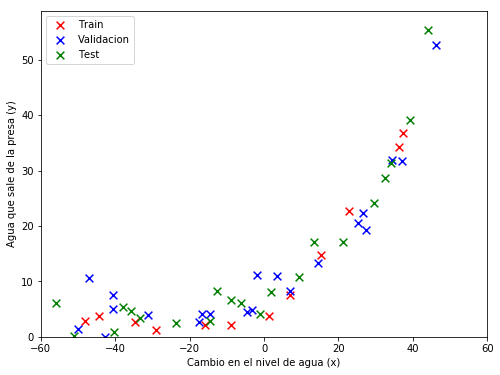

In [20]:
# Dibujar datos
plt.figure(figsize=(8, 6))
plt.scatter(Xtrain,Ytrain,s=60,marker='x' ,c='red',label='Train')
plt.scatter(Xval,Yval,s=60,marker='x' ,c='blue',label='Validacion')
plt.scatter(Xtest,Ytest,s=60,marker='x' ,c='green',label='Test')
axes = plt.gca()
axes.set_xlabel("Cambio en el nivel de agua (x)")
axes.set_ylabel("Agua que sale de la presa (y)")
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, labels)
plt.xlim(-60,60)
plt.ylim(ymin=0);

## Regresión lineal - Curva de aprendizaje
Vamos a comenzar a trabajar con la regresión lineal. Para ello, vamos a hacer uso del paquete LinearRegression de scikit-learn ([Link a LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)).

En el caso de la regresión lineal de scikit, hablamos de la regresión lineal SIN regularización (la versión con regularización se llama Ridge() y la utilizaremos más adelante. ([Link a RidgeRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)).

Error en train: 22.3739064951
Error en val: 29.4338181299
1 test passed.
1 test passed.


<Figure size 576x432 with 0 Axes>

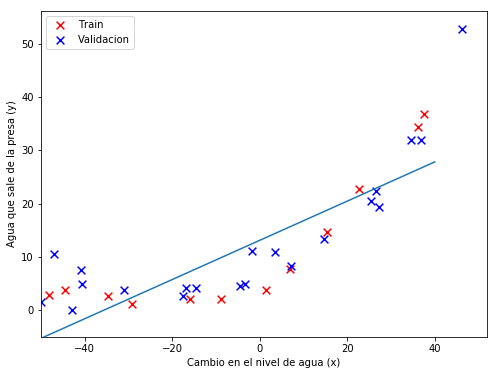

In [21]:
from sklearn.linear_model import LinearRegression

# Vamos a comprobar como funciona la regresión lineal en este problema

# Crea el objeto LinearRegression
LinReg =  LinearRegression()

# Entrena la regresión lineal con los datos de train
LinReg.fit(Xtrain, Ytrain)

# Dibuja la salida obtenida por la regresión lineal junto con los datos de train/val
plt.figure(figsize=(8, 6))

# Dibujamos los puntos de train y test
# Dibujar datos
plt.figure(figsize=(8, 6))
plt.scatter(Xtrain,Ytrain,s=60,marker='x' ,c='red',label='Train')
plt.scatter(Xval,Yval,s=60,marker='x' ,c='blue',label='Validacion')

# Establecemos las etiquetas de los ejes y la leyenda
axes = plt.gca()
axes.set_xlabel("Cambio en el nivel de agua (x)")
axes.set_ylabel("Agua que sale de la presa (y)")
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, labels)
# Creamos los puntos para obtener la recta mediante np.linspace, utilizaremos puntos entre -50 y 40
xx = np.linspace(-50,40)
# Obtenemos la predicción para dichos puntos con predict. 
# Recuerda que como trabajamos con una única característica, debemos hacer un reshape a -1,1
yy = LinReg.predict(xx.reshape(-1,1))
plt.plot(xx,yy,label='LinearRegression')


# Establecemos los límites de x e y
plt.ylim(ymin=-5)
plt.xlim(xmin=-50)

# Calculamos e imprimimos los errores en train / val
# Para ello debes calcular el error cuadrático medio (valor medio de las diferencias entre la predicción y la salida desea) dividido por 2
prediccion1 = LinReg.intercept_+LinReg.coef_*Xtrain#
prediccion2 = LinReg.intercept_+LinReg.coef_*Xval
Etrain=(np.sum((prediccion1-Ytrain)**2)/mtrain)/2
Eval=(np.sum((prediccion2-Yval)**2)/mval)/2
print('Error en train: {}'.format(Etrain))
print('Error en val: {}'.format(Eval))

Test.assertEquals(round(Etrain, 4), 22.3739, 'Error en train erróneo')
Test.assertEquals(round(Eval, 4), 29.4338, 'Error en test erróneo')

### Curva de aprendizaje para la regresión lineal
Debemos pintar la curva de aprendizaje para la regresión lineal según aumenta el número de ejemplos. Debe mostrarse el número de ejemplos en el eje x y el error en train y validación en el y.

¿Cómo evoluciona el error? (train/val) ¿Por qué no obtenemos una buena generalización? ¿Es un problema de bias alto o de varianza alta? 

Esperamos que el error de train aumente hasta cierto punto, mientras que el de validación debe decrecer.Finalmente, se observará un problema de bias alto, debido a que la regresión lineal no es capaz de ajustarse a los datos no lineales.

Para realizar el ejercicio debes entrenar varios modelos lineales con datos desde 1 hasta `mtrain` y usar el conjunto de validación (o test en este caso) para dibujar la curva con los errores en cada conjunto según aumenta el número de ejemplos.

**TEN EN CUENTA QUE PARA OBTENER EL ERROR EN TRAIN DEBES UTILIZAR EL CONJUNTO REDUCIDO**

1 test passed.
1 test passed.


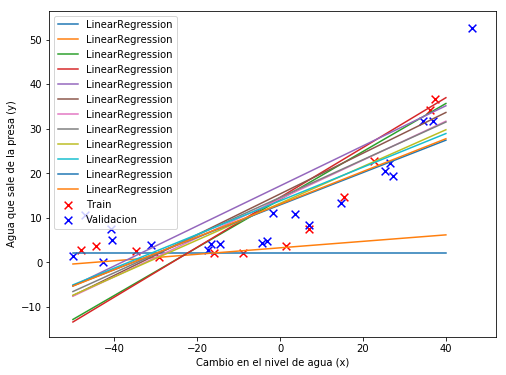

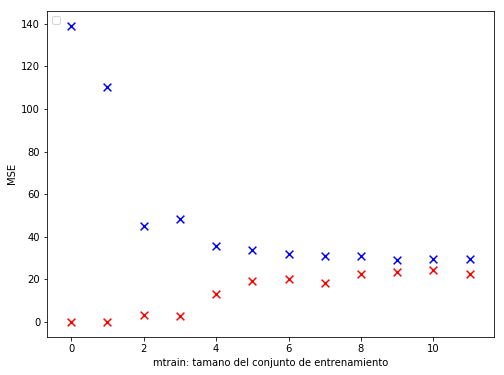

In [22]:
# Creamos el objeto de regresión lineal
LinReg =LinearRegression() 
# Creamos dos arrays para almacenar los resultados de error en train y validación de tamaño mtrain x 1
Etrain =np.zeros((mtrain,1))
Eval = np.zeros((mtrain,1))

plt.figure(figsize=(8, 6))
plt.scatter(Xtrain,Ytrain,s=60,marker='x' ,c='red',label='Train')
plt.scatter(Xval,Yval,s=60,marker='x' ,c='blue',label='Validacion')
axes = plt.gca()
axes.set_xlabel("Cambio en el nivel de agua (x)")
axes.set_ylabel("Agua que sale de la presa (y)")


# Creamos los puntos para obtener la recta mediante np.linspace, utilizaremos puntos entre -50 y 40
xx = np.linspace(-50,40)
# Obtenemos la predicción para dichos puntos con predict. 
# Recuerda que como trabajamos con una única característica, debemos hacer un reshape a -1,1
# Comenzamos probando a entrenar la regresión con un solo ejemplo y realizamos la misma tarea hasta mtrain
for i in range(0, mtrain):
    # Ajustamos la regresió con los i primeros ejemplos (filas)
    LinReg.fit(Xtrain[:i+1,0].reshape(-1,1), Ytrain[:i+1,0].reshape(-1,1))
    # Calculamos el error en train (SOBRE LOS i PRIMEROS EJEMPLOS) y validación
    prediccion1 = LinReg.intercept_+LinReg.coef_*Xtrain
    prediccion2 = LinReg.intercept_+LinReg.coef_*Xval
    Etrain[i,0]=np.mean((prediccion1[:i+1]-Ytrain[:i+1,])**2)/2
    Eval[i,0]=(np.sum((prediccion2-Yval)**2)/mval)/2
    yy = LinReg.predict(xx.reshape(-1,1))
    plt.plot(xx,yy,label='LinearRegression')
        # Pintamos en cada iteración la misma figura que en el apartado anterior con la recta aprendida en cada ocasión


handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, labels)
    

# Ahora con todos los errores en Etrain y Eval, pintamos la curva de aprendizaje
# En el eje X debemos tener el número de ejemplos utilizados para el entrenamiento (de 1 a mtrain) y en el eje y
# debe de aparecer el error obtenido. Pintamos con diferente color cada error (train/val)
plt.figure(figsize=(8, 6))
pp=np.arange(mtrain)
# Establecemos las etiquetas
plt.xlabel('mtrain: tamano del conjunto de entrenamiento')
plt.ylabel('MSE')
plt.legend(loc=2)
plt.scatter(pp,Etrain,s=60,marker='x' ,c='red')
plt.scatter(pp,Eval,s=60,marker='x' ,c='blue')

Test.assertEquals(map(lambda x: round(x, 4), Etrain), [0.0, 0.0, 3.2866, 2.8427, 13.154, 19.444, 20.0985, 18.1729, 22.6094, 23.2615, 24.3172, 22.3739], 'Errores en train erróneos')
Test.assertEquals(map(lambda x: round(x, 4), Eval.ravel()), [138.8468, 110.3004, 45.0102, 48.3689, 35.8652, 33.83, 31.971, 30.8624, 31.136, 28.9362, 29.5514, 29.4338], 'Errores en test erróneos')

## Regresión polinomial - Curva de aprendizaje
Vamos a intentar solucionar el problema que tenemos mediante la regresión polinomial, ya que parece que estamos ante un problema cuya solución no es lineal.

Para poder hacer uso de las características polinomiales utilizaremos la clase `PolynomialFeatures` de scikit junto con `StandardScaler` (para normalizar las características tras obtener las polinómicas y que el algoritmo de minimización funcione correctamente).

In [24]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# Mapear Xtrain a características polinómicas y normalizar
# Primero debemos establecer el grado el polinomio que vamos a utilizar
grado = 6
poly = PolynomialFeatures(grado,include_bias=False)# utilizar include_bias=False ya que con scikit no lo neceistamos
# Crear objeto StandardScaler
print poly
ss = StandardScaler()

# Utiliza fit_transform para obtener el conjunto de datos de train transformado con características polinomiales
Xtrain_poly =poly.fit_transform(Xtrain) 
# Ahora utiliza el StandardScaler creado con fit_transform para ajustarlo y transformar los datos polinomiales
Xtrain_poly = ss.fit_transform(Xtrain_poly)

# IMPORTANTE!!!!!!!!!!!!!
# DEBES HACER LO MISMO CON LOS CONJUNTOS DE VALIDACIÓN Y TEST; PERO TEN EN
# CUENTA QUE LA MEDIA Y LA DESVIACIÓN ESTÁNDAR A UTILIZAR SON LAS
# CALCULADAS EN TRAIN Y POR TANTO SOLO DEBES USAR TRANSFORM EN LUGAR DE FIT_TRANSFORM

# Mapear Xval a características polinómicas y normalizar 
Xval_poly=poly.fit_transform(Xval)
Xval_poly=ss.transform(Xval_poly)

# Mapear Xtest a características polinómicas y normalizar 
Xtest_poly=poly.fit_transform(Xtest)
Xtest_poly=ss.transform(Xtest_poly)


PolynomialFeatures(degree=6, include_bias=False, interaction_only=False)


Una vez obtenidas las nuevas características, lleva a cabo la regresión polinomial con la misma función utilizada anteriormente y dibuja el resultado además de mostrar los errores para train/val.

## Curva de aprendizaje para la regresión polinomial
Debes realizar el mismo ejercicio que para la regresión lineal, pero esta vez haciendo uso de las nuevas características polinómicas, ¿Qué ocurre ahora?

(12,)
(12, 1)
Error en train: 0.198052943128
Error en val: 22.1194196189
1 test passed.
1 test passed.


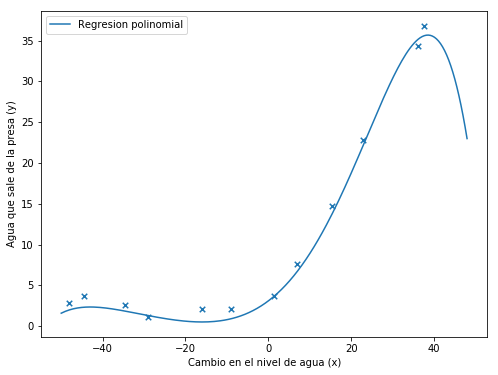

In [25]:
# Crear objeto LinearRegression y entrenarlo con los datos de train polinomiales
LinReg =LinearRegression()
LinReg.fit(Xtrain_poly,Ytrain.ravel())

# Dibujar los datos y la regresión obtenida
plt.figure(figsize=(8,6))
plt.scatter(Xtrain,Ytrain,s=30,marker='x',linewidths=1)

# Para poder pintar la recta, los datos obtenidos con np.linspace 
# deben transformarse para obtener los datos polinomiales y normalizados
xx = np.linspace(-50,48,num=200).reshape(-1, 1)
xx_poly =poly.fit_transform(xx) 
xx_poly=ss.fit_transform(xx_poly)
yy =LinReg.predict(xx_poly) 


plt.plot(xx,yy,label='Regresion polinomial')
plt.xlabel('Cambio en el nivel de agua (x)')
plt.ylabel('Agua que sale de la presa (y)')
plt.legend(loc=2)


# Obtenemos el error para train y validación con la regresión obtenida
# Imprimir errores en train / val
yytrain=LinReg.predict(Xtrain_poly)
yyval=LinReg.predict(Xval_poly)

print yytrain.shape
print Ytrain.shape
Etrain=np.mean((yytrain.reshape(-1,1)-Ytrain)[:,0]**2)/2
Eval=np.mean((yyval.reshape(-1,1)-Yval)[:,0]**2)/2
print('Error en train: {}'.format(Etrain))
print('Error en val: {}'.format(Eval))


Test.assertEquals(round(Etrain, 4), 0.1981, 'Error en train erróneo')
Test.assertEquals(round(Eval, 4), 22.1194, 'Error en test erróneo')

## Seleccionando el valor de lambda usando el conjunto de validación
Vamos a utilizar ahora el conjunto de validación para establecer el mejor valor de lambda, cuya capacidad de generalización evaluaremos posteriormente en el conjunto de test.

En este apartado debes:
1. Mostrar el resultado obtenido gráficamente (la mejor regresión obtenida)
2. Mostrar los errores para cada conjunto (train/val/test) para cada valor de lambda, tanto gráficamente como por pantalla utilizando la librería panda

Para ello debes realizar un bucle en el que entrenes la regresión lineal con regularización con diferentes valores de lambda ($\lambda$). Debes hacer uso de la clase Ridge de scikit-learn, que es la regresión lineal con regularización y cuyo parámetro `alpha` es el parámetro lambda ($\lambda$) de regularización.

En cada iteración del bucle, crearemos la regresión lineal  con el valor de $\lambda$ correspondiente y la ajustaremos al conjunto de entrenamiento. Posteriormente, debemos obtener los errores para train/val/test. **Siempre mantendremos como mejor regresión aquella que nos ha dado el menor error de validación.**

1 test passed.
1 test failed. Errores en test erróneos


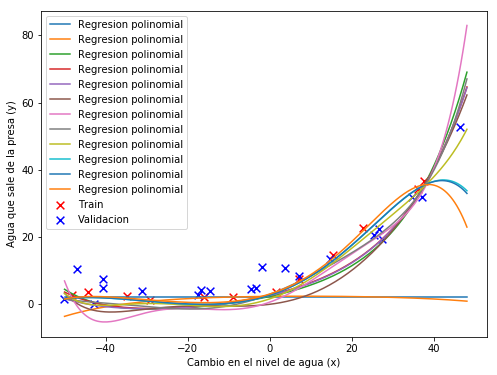

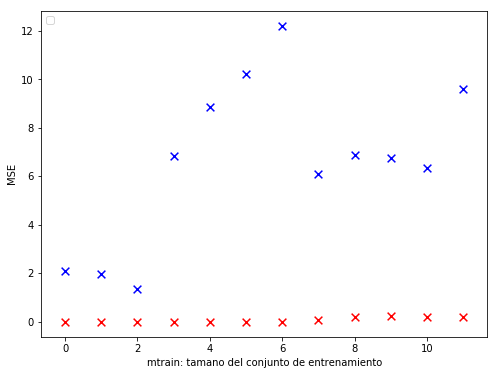

In [26]:
# Creamos objeto LinearRegression
LinReg =LinearRegression()

# Creamos dos arrays para almacenar los resultados de error en train y validación de tamaño mtrain x 1
Etrain =np.zeros((mtrain,1))
Eval = np.zeros((mtrain,1))


plt.figure(figsize=(8, 6))
plt.scatter(Xtrain,Ytrain,s=60,marker='x' ,c='red',label='Train')
plt.scatter(Xval,Yval,s=60,marker='x' ,c='blue',label='Validacion')
axes = plt.gca()
axes.set_xlabel("Cambio en el nivel de agua (x)")
axes.set_ylabel("Agua que sale de la presa (y)")


# Para poder pintar la recta, creamos datos con np.linspace  y debemos
# transformarlos para obtener los datos polinomiales y normalizados
# Lo hacemos antes de entrar al bucle ya que lo reutilizaremos
xx = np.linspace(-50,48,num=200).reshape(-1,1)
xx_poly =poly.fit_transform(xx)


# Comenzamos probando a entrenar la regresión con un solo ejemplo y realizamos la misma tarea hasta mtrain
for i in range(0, mtrain):
    
    # Ajustamos la regresión con los i primeros ejemplos (filas)
    LinReg.fit(Xtrain_poly[:i+1,],Ytrain[:i+1,])
    xx_poly=ss.fit_transform(xx_poly)
    yy =LinReg.predict(xx_poly) 
    # Calculamos el error en train (SOBRE LOS i PRIMEROS EJEMPLOS) y validación
    yt=LinReg.predict(Xtrain_poly[:i+1,])
    yv=LinReg.predict(Xval_poly[:i+1,])
    Etrain[i]=np.mean(((yt)-Ytrain[:i+1,])**2)/2
    Eval[i]=np.mean((yv-Yval[:i+1,])[:,0]**2)/2
    # Pintamos en cada iteración la misma figura que en el apartado anterior con la recta aprendida en cada ocasión



    plt.plot(xx,yy,label='Regresion polinomial')
    plt.xlabel('Cambio en el nivel de agua (x)')
    plt.ylabel('Agua que sale de la presa (y)')
    plt.legend(loc=2)
      
# Ahora con todos los errores en Etrain y Eval, pintamos la curva de aprendizaje
# En el eje X debemos tener el número de ejemplos utilizados para el entrenamiento (de 1 a mtrain) y en el eje y
# debe de aparecer el error obtenido. Pintamos con diferente color cada error (train/val)
plt.figure(figsize=(8, 6))
pp=np.arange(mtrain)

# Establecemos las etiquetas
plt.xlabel('mtrain: tamano del conjunto de entrenamiento')
plt.ylabel('MSE')
plt.legend(loc=2)
plt.scatter(pp,Etrain,s=60,marker='x' ,c='red')
plt.scatter(pp,Eval,s=60,marker='x' ,c='blue')

Test.assertEquals(map(lambda x: round(x, 4), Etrain), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0759, 0.1837, 0.2249, 0.2047, 0.1981], 'Errores en train erróneos')
Test.assertEquals(map(lambda x: round(x, 4), Eval), [138.8468, 143.3814, 7.6642, 5.9997, 6.3575, 9.9761, 17.8565, 6.413, 7.9338, 13.5543, 14.0629, 22.1194], 'Errores en test erróneos')

             Test  Validation      Train
Lambda                                  
0.000    0.198053   22.119420  18.680864
0.001    0.199041   19.795512  17.087098
0.003    0.203408   17.291110  15.379008
0.010    0.224028   13.767304  13.029147
0.030    0.282869   10.427051  10.812698
0.100    0.449615    7.012447   7.779995
0.300    0.878653    4.796852   4.684098
1.000    1.911367    3.933500   3.098760
3.000    4.497542    3.540900   4.397619
10.000  15.240857   10.596068  17.234139
1 test passed.
1 test passed.
1 test passed.


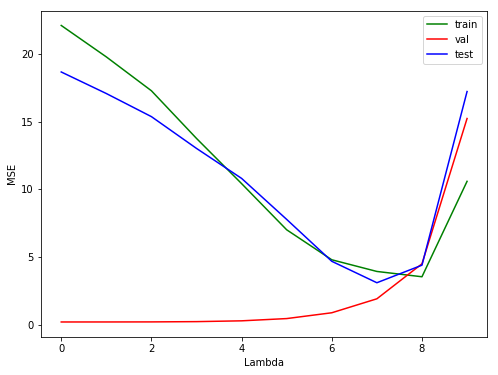

In [89]:
# Importamos Ridge que es la regresión lineal con regularización
from sklearn.linear_model import Ridge

# Aprende el mejor valor de lambda entre:
lambda_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])

# Inicializamos los valores
bestLinReg = None
# Arrays para los errores
Etrain = np.zeros((10,1))
Eval =np.zeros((10,1)) 
Etest = np.zeros((10,1))
best_err = np.Inf
best_lambda = lambda_vec[0]
for i in range(0, lambda_vec.size):
    # Obtenemos el valor de lambda a utilizar
    valorLambda = lambda_vec[i]
    # Creamos el objeto Ridge con dicho valor de lambda
    LinReg = Ridge(alpha=valorLambda)
    # Ajustamos la regresión
    LinReg.fit(Xtrain_poly, Ytrain.ravel()) 
    # Calculamos los errores de train/val/test
    yyTrain=LinReg.predict(Xtrain_poly)
    yyVal=LinReg.predict(Xval_poly)
    yyTest=LinReg.predict(Xtest_poly)
    Etrain[i,0]=np.mean((yyTrain.reshape(-1,1)-Ytrain)[:,0]**2)/2
    Eval[i,0]=np.mean((yyVal.reshape(-1,1)-Yval)[:,0]**2)/2
    Etest[i,0]=np.mean((yyTest.reshape(-1,1)-Ytest)[:,0]**2)/2
    #En caso de ser el mejor modelo encontrado, guardamos el mejor error, la regresión y el valor de lambda
    if (Eval[i] < best_err):
        best_err =Eval[i]#<RELLENAR>
        bestLinReg = Etest[i]#<RELLENAR>
        best_lambda =valorLambda #<RELLENAR>


        
# Pintamos la figura que muestre todos los datos de train/val/test (cada uno de un color) y la mejor regresión
# obtenida.
plt.figure(figsize=(8, 6))
axes = plt.gca()
plt.plot(np.arange(10),Eval,c="g",label="Validate")
plt.plot(np.arange(10),Etrain,c="r",label="Train")
plt.plot(np.arange(10),Etest,c="b",label="Test")
axes = plt.gca()
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, labels)
        
# Pintamos también una figura en la que en el eje x aparezcan los diferentes valores de lambda y en el eje y los
# diferentes errores obtenidos en cada uno de los conjuntos (mostrar cada uno con un color diferente).

# Establecemos las etiquetas y la leyenda
plt.xlabel('Lambda');
plt.ylabel('MSE');
plt.legend(['train', 'val', 'test'])

# Finalmente, vamos a mostrar los datos de la última figura en forma de tabla utilizando los Pandas

# Concatenamos horizontalmente los datos a mostrar (hstack de las variable Etrain, Eval y Etest
# con su correspondiente reshape a -1, 1)
datosPD =np.hstack((Etrain.reshape(-1,1),np.hstack((Eval.reshape(-1,1),Etest.reshape(-1,1)))))
# Creamos los nombres de las columnas, una lista con los strings Train, Validation, Test
nombreColumnas ={"Train","Validation","Test"}

# Importamos la librería de pandas ya que no lo hemos hecho anteriormente
import pandas as pd
# Generamos el dataframe con data=datosPD, index=lambda_vec y columns=nombreColumnas
datosPanda = pd.DataFrame(data=datosPD, index=lambda_vec, columns=nombreColumnas)

# Establecemos el nombre de la columna index (valores de lambda)
datosPanda.index.name = 'Lambda'
# Mostramos el dataframe generado
print (datosPanda)

Test.assertEquals(map(lambda x: round(x, 4), Etrain), [0.1981, 0.199, 0.2034, 0.224, 0.2829, 0.4496, 0.8787, 1.9114, 4.4975, 15.2409], 'Errores en train erróneos')
Test.assertEquals(map(lambda x: round(x, 4), Eval), [22.1194, 19.7955, 17.2911, 13.7673, 10.4271, 7.0124, 4.7969, 3.9335, 3.5409, 10.5961], 'Errores en validación erróneos')
Test.assertEquals(map(lambda x: round(x, 4), Etest), [18.6809, 17.0871, 15.379, 13.0291, 10.8127, 7.78, 4.6841, 3.0988, 4.3976, 17.2341], 'Errores en test erróneos')

## Particionamiento de los datos en particiones de train/val/test

Vamos a aprender a particionar los datos de manera aleatoria para las prácticas futuras.

Debes particionar los datos disponibles en tres partes. Para ello, antes debes unir los Xtrain, Xval e Xtest (lo mismo con las y's) en un único vector que contenga todos los datos. Ahora particionaremos de nuevo estos datos en las variables correspondientes. Almacénalas en las variables Xtrain, Xval, Xtest e ytrain, yval, ytest.

Ten en cuenta que debe de haber correspondencia entre los datos anteriores ($X$, $y$) y los nuevos (Xtrain, ytrain), (Xval, yval), (Xtest, ytest). Utilizaremos un 60% de los datos para train, un 20% para  validación y un 20% para test (el particionamiento no es exacto al haber 54 datos, pero debes utilizar todos igualmente).

El particionamiento debe ser ALEATORIO; por lo que puedes hacer uso de la función `np.random.permutation(N)` que devuelve la permutación de $N$ elementos de $1..N$; es decir, puedes usarlo para obtener índices nuevos para reordenar el vector $X$ y particionarlo posteriormente

1 test passed.
1 test passed.
1 test passed.
1 test passed.
1 test passed.
1 test passed.


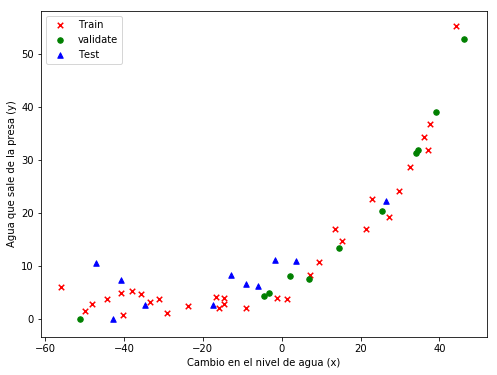

In [90]:
# Utilizamos la semilla para que obtengamos siempre las mismas particiones en este bloque
np.random.seed(123456789)

# Retomamos los valores de las particiones iniciales en caso de reejecutar la celda
Xtrain = train[:, :-1]
Xval = val[:, :-1]
Xtest = test[:, :-1]
ytrain = train[:, -1]
yval = val[:, -1]
ytest = test[:, -1]

# Concatenamos todos los conjuntos X en uno solo
X = np.concatenate((Xtrain.ravel(),Xval.ravel(),Xtest.ravel()),axis=0)

# Concatenamos todos los valores de las salidas y en uno solo
y = np.concatenate((ytrain.ravel(),yval.ravel(),ytest.ravel()),axis=0)
# Obtenemos el número de ejemplos actuales
m = y.shape
m=m[0]
# Utiliza np.random.permutation para obtener la localización de los ejemplos aleatoriamente
# Luego aplica estos nuevos índices a X e y para reordenarlos aleatoriamente
newIndex =np.random.permutation(m)

X =X[newIndex] 
y = y[newIndex]

# Establece el número de ejemplos en mtrain y mval como el 60 y 20% de ejemplos en X (utiliza el redondeo y recuerda
# que el resultado debe ser un entero)
mtrain = np.around(m*0.6)
mval = np.around(m*0.2)
# Obtén el número de ejemplos en test como el número de ejemplos restantes a particionar
mtest =m-mval-mtrain 

# Crea los nuevos conjuntos
Xtrain=X[0:int(mtrain)]
ytrain=y[0:int(mtrain)]
Xval=X[int(mtrain):int(mtrain)+int(mval)]
yval=y[int(mtrain):int(mtrain)+int(mval)]
Xtest=X[int(mtrain)+int(mval):m]
ytest=y[int(mtrain)+int(mval):m]


# Dibuja la nueva distribución de puntos de train, validación y test
plt.figure(figsize=(8, 6))
plt.scatter(Xtrain,ytrain,s=30,marker='x',linewidths=1, c='red',label='Train')
plt.scatter(Xval,yval,s=30,marker='o',linewidths=1,c='green',label='validate')
plt.scatter(Xtest,ytest,s=30,marker='^',linewidths=1,c='blue',label='Test')
plt.xlabel('Cambio en el nivel de agua (x)')
plt.ylabel('Agua que sale de la presa (y)')
plt.legend(loc=2)
axes = plt.gca()
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, labels)

Test.assertEquals(map(lambda x: round(x, 4),Xtrain[:5].ravel()), [-40.6861, -29.153, -8.9415, 22.7627, -48.0588], 'Particionamiento de Xtrain erróneo')
Test.assertEquals(map(lambda x: round(x, 4),Xval[:5].ravel()), [7.0135, 1.9745, 34.0545, -3.2639, 25.3741], 'Particionamiento de Xtrain erróneo')
Test.assertEquals(map(lambda x: round(x, 4),Xtest[:5].ravel()), [-42.7977, 26.5336, -47.0101, -6.1326, -34.7063], 'Particionamiento de Xtrain erróneo')
Test.assertEquals(map(lambda x: round(x, 4),ytrain[:5].ravel()), [4.9594, 1.1733, 2.1211, 22.7524, 2.809], 'Particionamiento de ytrain erróneo')
Test.assertEquals(map(lambda x: round(x, 4),yval[:5].ravel()), [7.6277, 8.0873, 31.3236, 4.8838, 20.5038], 'Particionamiento de yval erróneo')
Test.assertEquals(map(lambda x: round(x, 4),ytest[:5].ravel()), [-0.0, 22.2763, 10.6237, 6.1926, 2.6142], 'Particionamiento de ytest erróneo')